In [5]:
import pandas as pd
import json

# Load the JSON data, handling potential multiple JSON objects
try:
    with open('dataset_1.json', 'r') as f:
        data = pd.read_json(f)  # Try reading as a single JSON object or list of objects
except ValueError:
    with open('dataset_1.json', 'r') as f:
        # If reading as a single object fails, try reading as lines
        data = pd.read_json(f, lines=True)

# Convert to Excel
data.to_excel('output.xlsx', index=False)

#python code for Identify and remove null or missing values.

In [7]:
import pandas as pd

# Load the Excel file
file_path = 'output.xlsx'  # Adjust the file path as needed
data = pd.read_excel(file_path)

# Display the first few rows of the data
print("Original Data:")
print(data.head())

# Check for null values
null_counts = data.isnull().sum()
print("\nNull values in each column:")
print(null_counts)

# Remove rows with null values
cleaned_data = data.dropna()

# Display the cleaned data
print("\nCleaned Data:")
print(cleaned_data.head())

# Save the cleaned data to a new Excel file
cleaned_file_path = 'cleaned_output.xlsx'
cleaned_data.to_excel(cleaned_file_path, index=False)

print(f"\nCleaned data saved to {cleaned_file_path}")


Original Data:
                                                 url make_model  \
0  https://www.autoscout24.com//offers/audi-a1-sp...    Audi A1   
1  https://www.autoscout24.com//offers/audi-a1-1-...    Audi A1   
2  https://www.autoscout24.com//offers/audi-a1-sp...    Audi A1   
3  https://www.autoscout24.com//offers/audi-a1-1-...    Audi A1   
4  https://www.autoscout24.com//offers/audi-a1-sp...    Audi A1   

                                   short_description body_type  price  \
0        Sportback 1.4 TDI S-tronic Xenon Navi Klima    Sedans  15770   
1                                     1.8 TFSI sport    Sedans  14500   
2  Sportback 1.6 TDI S tronic Einparkhilfe plus+m...    Sedans  14640   
3                            1.4 TDi Design S tronic    Sedans  14500   
4  Sportback 1.4 TDI S-Tronic S-Line Ext. admired...    Sedans  16790   

                vat         km registration         prev_owner  kW  ...  \
0    VAT deductible  56,013 km      01/2016  2 previous owners NaN  

#python code for Standardize numerical fields (e.g., price, km) for consistency.

In [10]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load the Excel file
file_path = 'output.xlsx'  # Adjust the file path as needed
data = pd.read_excel(file_path)

# Display the first few rows of the data
print("Original Data:")
print(data.head())

# Select numerical columns to standardize (e.g., 'price', 'km')
columns_to_standardize = ['price', 'km']

# Check if columns exist in the data
columns_to_standardize = [col for col in columns_to_standardize if col in data.columns]

# Clean the 'km' column to remove commas, 'km', and hyphens and convert to numeric
# Assuming 'km' values are like '56,013 km' or '-'
data['km'] = data['km'].str.replace(',', '').str.replace(' km', '').str.replace('-', '0')  # Replace hyphens with 0
data['km'] = pd.to_numeric(data['km'], errors='coerce').fillna(0).astype(float)  # Convert to numeric, handle errors, and fill NaN with 0

# Standardize the selected columns
scaler = StandardScaler()
data[columns_to_standardize] = scaler.fit_transform(data[columns_to_standardize])

# Display the standardized data
print("\nStandardized Data:")
print(data.head())

# Save the standardized data to a new Excel file
standardized_file_path = 'standardized_output.xlsx'
data.to_excel(standardized_file_path, index=False)

print(f"\nStandardized data saved to {standardized_file_path}")

Original Data:
                                                 url make_model  \
0  https://www.autoscout24.com//offers/audi-a1-sp...    Audi A1   
1  https://www.autoscout24.com//offers/audi-a1-1-...    Audi A1   
2  https://www.autoscout24.com//offers/audi-a1-sp...    Audi A1   
3  https://www.autoscout24.com//offers/audi-a1-1-...    Audi A1   
4  https://www.autoscout24.com//offers/audi-a1-sp...    Audi A1   

                                   short_description body_type  price  \
0        Sportback 1.4 TDI S-tronic Xenon Navi Klima    Sedans  15770   
1                                     1.8 TFSI sport    Sedans  14500   
2  Sportback 1.6 TDI S tronic Einparkhilfe plus+m...    Sedans  14640   
3                            1.4 TDi Design S tronic    Sedans  14500   
4  Sportback 1.4 TDI S-Tronic S-Line Ext. admired...    Sedans  16790   

                vat         km registration         prev_owner  kW  ...  \
0    VAT deductible  56,013 km      01/2016  2 previous owners NaN  

# python code for Convert string fields like registration into proper datetime objects.

In [11]:
import pandas as pd

# Load the Excel file
file_path = 'output.xlsx'  # Adjust the file path as needed
data = pd.read_excel(file_path)

# Display the first few rows of the data
print("Original Data:")
print(data.head())

# Convert the 'registration' column to datetime
if 'registration' in data.columns:
    data['registration'] = pd.to_datetime(data['registration'], errors='coerce')
    print("\nConverted 'registration' to datetime format:")
    print(data['registration'].head())
else:
    print("\nColumn 'registration' not found in the dataset.")

# Check for any rows where conversion failed (NaT indicates invalid date)
invalid_dates = data[data['registration'].isna()]
if not invalid_dates.empty:
    print("\nRows with invalid 'registration' dates:")
    print(invalid_dates)

# Save the updated data to a new Excel file
converted_file_path = 'converted_output.xlsx'
data.to_excel(converted_file_path, index=False)

print(f"\nUpdated data saved to {converted_file_path}")


Original Data:
                                                 url make_model  \
0  https://www.autoscout24.com//offers/audi-a1-sp...    Audi A1   
1  https://www.autoscout24.com//offers/audi-a1-1-...    Audi A1   
2  https://www.autoscout24.com//offers/audi-a1-sp...    Audi A1   
3  https://www.autoscout24.com//offers/audi-a1-1-...    Audi A1   
4  https://www.autoscout24.com//offers/audi-a1-sp...    Audi A1   

                                   short_description body_type  price  \
0        Sportback 1.4 TDI S-tronic Xenon Navi Klima    Sedans  15770   
1                                     1.8 TFSI sport    Sedans  14500   
2  Sportback 1.6 TDI S tronic Einparkhilfe plus+m...    Sedans  14640   
3                            1.4 TDi Design S tronic    Sedans  14500   
4  Sportback 1.4 TDI S-Tronic S-Line Ext. admired...    Sedans  16790   

                vat         km registration         prev_owner  kW  ...  \
0    VAT deductible  56,013 km      01/2016  2 previous owners NaN  

<ipython-input-11-f655ed3db9fc>:13: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['registration'] = pd.to_datetime(data['registration'], errors='coerce')



Updated data saved to converted_output.xlsx


#python code for Calculate mean, median, and standard deviation for price and km.

In [13]:
import pandas as pd

# Load the Excel file
file_path = 'standardized_output.xlsx'  # Adjust the file path as needed
data = pd.read_excel(file_path)

# Display the first few rows of the data
print("Original Data:")
print(data.head())

# Select numerical columns (e.g., 'price', 'km')
columns_to_analyze = ['price', 'km']

# Check if columns exist in the data
columns_to_analyze = [col for col in columns_to_analyze if col in data.columns]

# Calculate statistics
statistics = {}
for column in columns_to_analyze:
    stats = {
        "mean": data[column].mean(),
        "median": data[column].median(),
        "std_dev": data[column].std()
    }
    statistics[column] = stats

# Display statistics
print("\nStatistics for selected columns:")
for column, stats in statistics.items():
    print(f"{column}: Mean = {stats['mean']}, Median = {stats['median']}, Std Dev = {stats['std_dev']}")

# Save statistics to a new Excel file
stats_df = pd.DataFrame(statistics).T  # Transpose to make columns the index
stats_df.index.name = 'Field'
stats_file_path = 'statistics_output.xlsx'
stats_df.to_excel(stats_file_path)

print(f"\nStatistics saved to {stats_file_path}")

Original Data:
                                                 url make_model  \
0  https://www.autoscout24.com//offers/audi-a1-sp...    Audi A1   
1  https://www.autoscout24.com//offers/audi-a1-1-...    Audi A1   
2  https://www.autoscout24.com//offers/audi-a1-sp...    Audi A1   
3  https://www.autoscout24.com//offers/audi-a1-1-...    Audi A1   
4  https://www.autoscout24.com//offers/audi-a1-sp...    Audi A1   

                                   short_description body_type     price  \
0        Sportback 1.4 TDI S-tronic Xenon Navi Klima    Sedans -0.304619   
1                                     1.8 TFSI sport    Sedans -0.476567   
2  Sportback 1.6 TDI S tronic Einparkhilfe plus+m...    Sedans -0.457612   
3                            1.4 TDi Design S tronic    Sedans -0.476567   
4  Sportback 1.4 TDI S-Tronic S-Line Ext. admired...    Sedans -0.166519   

                vat        km registration         prev_owner  kW  ...  \
0    VAT deductible  0.649222      01/2016  2 previ

#python code for Count the frequency of each make_model.

In [14]:
import pandas as pd

# Load the Excel file
file_path = 'output.xlsx'  # Adjust the file path as needed
data = pd.read_excel(file_path)

# Display the first few rows of the data
print("Original Data:")
print(data.head())

# Check if 'make_model' column exists
if 'make_model' in data.columns:
    # Count frequency of each make_model
    make_model_counts = data['make_model'].value_counts()
    print("\nFrequency of each make_model:")
    print(make_model_counts)

    # Save the frequency counts to a new Excel file
    make_model_counts_file_path = 'make_model_counts.xlsx'
    make_model_counts.to_excel(make_model_counts_file_path, index=True, header=["Frequency"])
    print(f"\nMake_model frequency counts saved to {make_model_counts_file_path}")
else:
    print("\nColumn 'make_model' not found in the dataset.")


Original Data:
                                                 url make_model  \
0  https://www.autoscout24.com//offers/audi-a1-sp...    Audi A1   
1  https://www.autoscout24.com//offers/audi-a1-1-...    Audi A1   
2  https://www.autoscout24.com//offers/audi-a1-sp...    Audi A1   
3  https://www.autoscout24.com//offers/audi-a1-1-...    Audi A1   
4  https://www.autoscout24.com//offers/audi-a1-sp...    Audi A1   

                                   short_description body_type  price  \
0        Sportback 1.4 TDI S-tronic Xenon Navi Klima    Sedans  15770   
1                                     1.8 TFSI sport    Sedans  14500   
2  Sportback 1.6 TDI S tronic Einparkhilfe plus+m...    Sedans  14640   
3                            1.4 TDi Design S tronic    Sedans  14500   
4  Sportback 1.4 TDI S-Tronic S-Line Ext. admired...    Sedans  16790   

                vat         km registration         prev_owner  kW  ...  \
0    VAT deductible  56,013 km      01/2016  2 previous owners NaN  

#python code for Plot the distribution of price and km.

Original Data:
                                                 url make_model  \
0  https://www.autoscout24.com//offers/audi-a1-sp...    Audi A1   
1  https://www.autoscout24.com//offers/audi-a1-1-...    Audi A1   
2  https://www.autoscout24.com//offers/audi-a1-sp...    Audi A1   
3  https://www.autoscout24.com//offers/audi-a1-1-...    Audi A1   
4  https://www.autoscout24.com//offers/audi-a1-sp...    Audi A1   

                                   short_description body_type  price  \
0        Sportback 1.4 TDI S-tronic Xenon Navi Klima    Sedans  15770   
1                                     1.8 TFSI sport    Sedans  14500   
2  Sportback 1.6 TDI S tronic Einparkhilfe plus+m...    Sedans  14640   
3                            1.4 TDi Design S tronic    Sedans  14500   
4  Sportback 1.4 TDI S-Tronic S-Line Ext. admired...    Sedans  16790   

                vat         km registration         prev_owner  kW  ...  \
0    VAT deductible  56,013 km      01/2016  2 previous owners NaN  

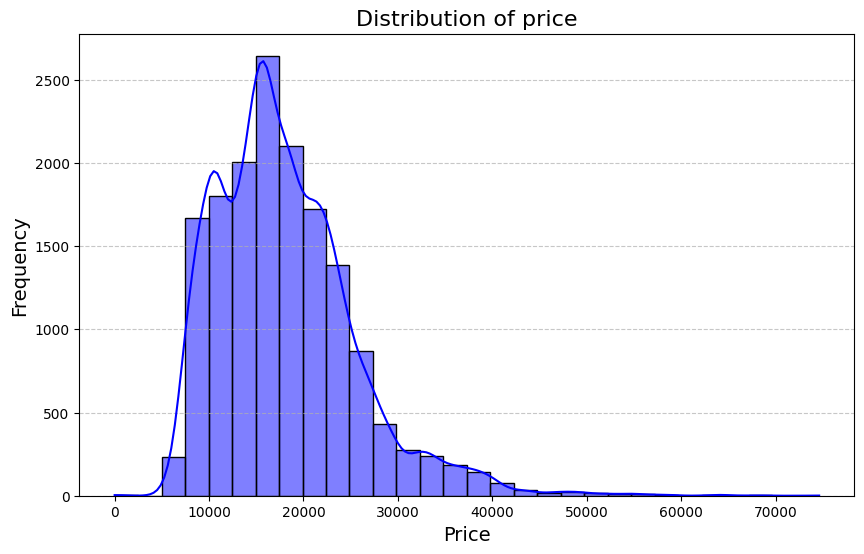

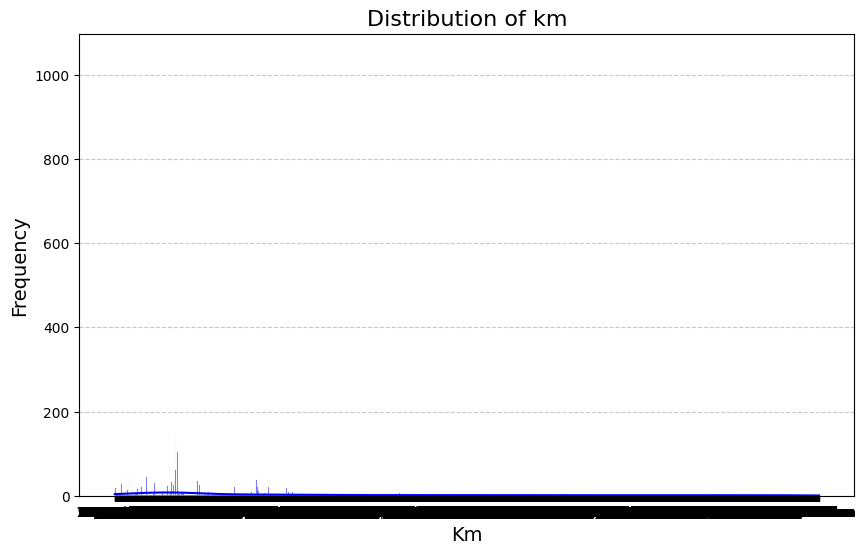

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Excel file
file_path = 'output.xlsx'  # Adjust the file path as needed
data = pd.read_excel(file_path)

# Display the first few rows of the data
print("Original Data:")
print(data.head())

# Select numerical columns to plot
columns_to_plot = ['price', 'km']

# Check if the columns exist in the dataset
columns_to_plot = [col for col in columns_to_plot if col in data.columns]

# Plot distributions
for column in columns_to_plot:
    plt.figure(figsize=(10, 6))
    sns.histplot(data[column], kde=True, bins=30, color='blue', edgecolor='black')
    plt.title(f'Distribution of {column}', fontsize=16)
    plt.xlabel(column.capitalize(), fontsize=14)
    plt.ylabel('Frequency', fontsize=14)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()


#python code for Analyze the average price by body_type.

In [16]:
import pandas as pd

# Load the Excel file
file_path = 'output.xlsx'  # Adjust the file path as needed
data = pd.read_excel(file_path)

# Display the first few rows of the data
print("Original Data:")
print(data.head())

# Check if 'body_type' and 'price' columns exist
if 'body_type' in data.columns and 'price' in data.columns:
    # Calculate the average price by body_type
    avg_price_by_body_type = data.groupby('body_type')['price'].mean().sort_values(ascending=False)
    print("\nAverage price by body_type:")
    print(avg_price_by_body_type)

    # Save the results to a new Excel file
    output_file_path = 'avg_price_by_body_type.xlsx'
    avg_price_by_body_type.to_excel(output_file_path, header=["Average Price"])
    print(f"\nAverage price by body_type saved to {output_file_path}")
else:
    print("\nColumns 'body_type' and/or 'price' not found in the dataset.")


Original Data:
                                                 url make_model  \
0  https://www.autoscout24.com//offers/audi-a1-sp...    Audi A1   
1  https://www.autoscout24.com//offers/audi-a1-1-...    Audi A1   
2  https://www.autoscout24.com//offers/audi-a1-sp...    Audi A1   
3  https://www.autoscout24.com//offers/audi-a1-1-...    Audi A1   
4  https://www.autoscout24.com//offers/audi-a1-sp...    Audi A1   

                                   short_description body_type  price  \
0        Sportback 1.4 TDI S-tronic Xenon Navi Klima    Sedans  15770   
1                                     1.8 TFSI sport    Sedans  14500   
2  Sportback 1.6 TDI S tronic Einparkhilfe plus+m...    Sedans  14640   
3                            1.4 TDi Design S tronic    Sedans  14500   
4  Sportback 1.4 TDI S-Tronic S-Line Ext. admired...    Sedans  16790   

                vat         km registration         prev_owner  kW  ...  \
0    VAT deductible  56,013 km      01/2016  2 previous owners NaN  

#python code for Identify correlations between numerical variables, such as price and km.

Original Data:
                                                 url make_model  \
0  https://www.autoscout24.com//offers/audi-a1-sp...    Audi A1   
1  https://www.autoscout24.com//offers/audi-a1-1-...    Audi A1   
2  https://www.autoscout24.com//offers/audi-a1-sp...    Audi A1   
3  https://www.autoscout24.com//offers/audi-a1-1-...    Audi A1   
4  https://www.autoscout24.com//offers/audi-a1-sp...    Audi A1   

                                   short_description body_type  price  \
0        Sportback 1.4 TDI S-tronic Xenon Navi Klima    Sedans  15770   
1                                     1.8 TFSI sport    Sedans  14500   
2  Sportback 1.6 TDI S tronic Einparkhilfe plus+m...    Sedans  14640   
3                            1.4 TDi Design S tronic    Sedans  14500   
4  Sportback 1.4 TDI S-Tronic S-Line Ext. admired...    Sedans  16790   

                vat         km registration         prev_owner  kW  ...  \
0    VAT deductible  56,013 km      01/2016  2 previous owners NaN  

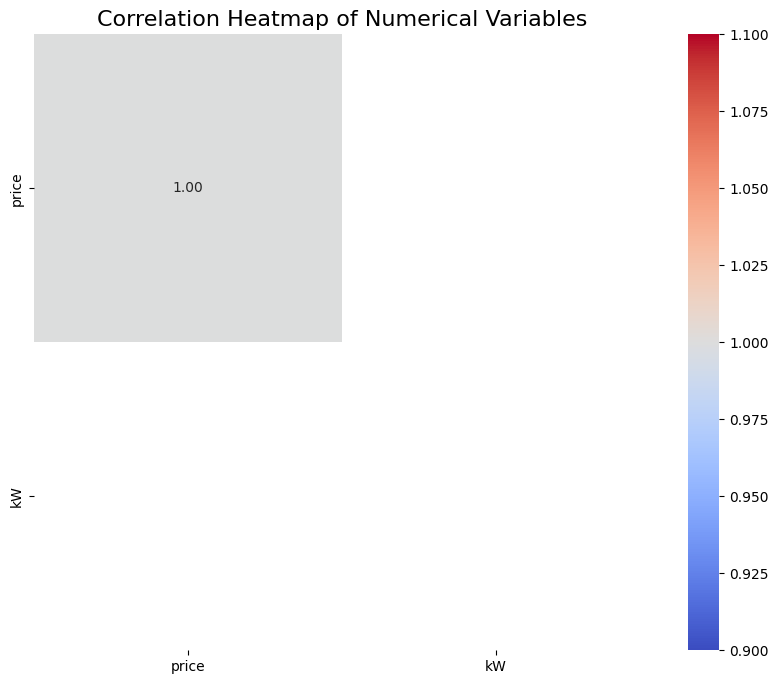

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the Excel file
file_path = 'output.xlsx'  # Adjust the file path as needed
data = pd.read_excel(file_path)

# Display the first few rows of the data
print("Original Data:")
print(data.head())

# Select numerical columns for correlation analysis
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = data[numerical_columns].corr()

# Display the correlation matrix
print("\nCorrelation matrix:")
print(correlation_matrix)

# Plot the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, square=True)
plt.title("Correlation Heatmap of Numerical Variables", fontsize=16)
plt.show()


#python code for Create a scatter plot to show the relationship between price and km.

Original Data:
                                                 url make_model  \
0  https://www.autoscout24.com//offers/audi-a1-sp...    Audi A1   
1  https://www.autoscout24.com//offers/audi-a1-1-...    Audi A1   
2  https://www.autoscout24.com//offers/audi-a1-sp...    Audi A1   
3  https://www.autoscout24.com//offers/audi-a1-1-...    Audi A1   
4  https://www.autoscout24.com//offers/audi-a1-sp...    Audi A1   

                                   short_description body_type  price  \
0        Sportback 1.4 TDI S-tronic Xenon Navi Klima    Sedans  15770   
1                                     1.8 TFSI sport    Sedans  14500   
2  Sportback 1.6 TDI S tronic Einparkhilfe plus+m...    Sedans  14640   
3                            1.4 TDi Design S tronic    Sedans  14500   
4  Sportback 1.4 TDI S-Tronic S-Line Ext. admired...    Sedans  16790   

                vat         km registration         prev_owner  kW  ...  \
0    VAT deductible  56,013 km      01/2016  2 previous owners NaN  

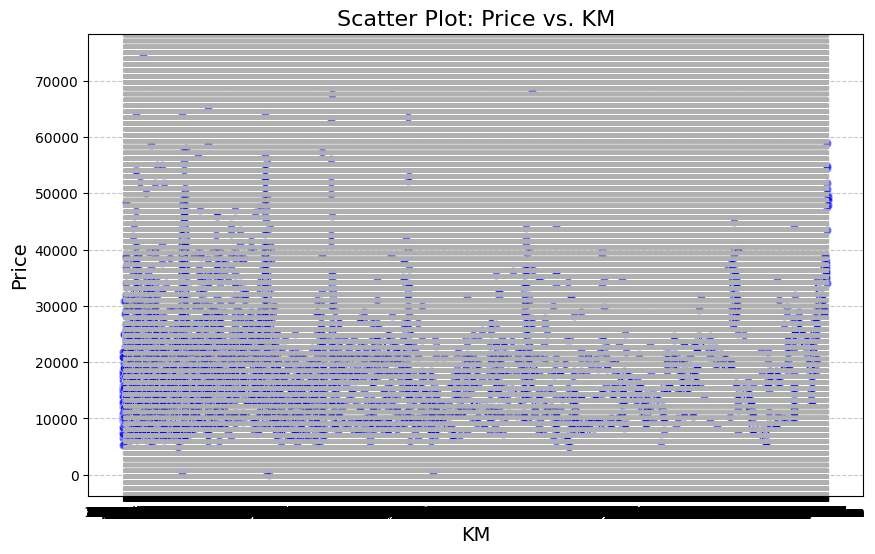

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Excel file
file_path = 'output.xlsx'  # Adjust the file path as needed
data = pd.read_excel(file_path)

# Display the first few rows of the data
print("Original Data:")
print(data.head())

# Check if 'price' and 'km' columns exist
if 'price' in data.columns and 'km' in data.columns:
    # Create a scatter plot
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=data['km'], y=data['price'], color='blue', alpha=0.6)
    plt.title("Scatter Plot: Price vs. KM", fontsize=16)
    plt.xlabel("KM", fontsize=14)
    plt.ylabel("Price", fontsize=14)
    plt.grid(linestyle='--', alpha=0.7)
    plt.show()
else:
    print("\nColumns 'price' and/or 'km' not found in the dataset.")


#python code for Use a bar chart to compare the average price of different body_type.

Original Data:
                                                 url make_model  \
0  https://www.autoscout24.com//offers/audi-a1-sp...    Audi A1   
1  https://www.autoscout24.com//offers/audi-a1-1-...    Audi A1   
2  https://www.autoscout24.com//offers/audi-a1-sp...    Audi A1   
3  https://www.autoscout24.com//offers/audi-a1-1-...    Audi A1   
4  https://www.autoscout24.com//offers/audi-a1-sp...    Audi A1   

                                   short_description body_type  price  \
0        Sportback 1.4 TDI S-tronic Xenon Navi Klima    Sedans  15770   
1                                     1.8 TFSI sport    Sedans  14500   
2  Sportback 1.6 TDI S tronic Einparkhilfe plus+m...    Sedans  14640   
3                            1.4 TDi Design S tronic    Sedans  14500   
4  Sportback 1.4 TDI S-Tronic S-Line Ext. admired...    Sedans  16790   

                vat         km registration         prev_owner  kW  ...  \
0    VAT deductible  56,013 km      01/2016  2 previous owners NaN  

<ipython-input-22-0eeba0c431cd>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_price_by_body_type.index, y=avg_price_by_body_type.values, palette="viridis")


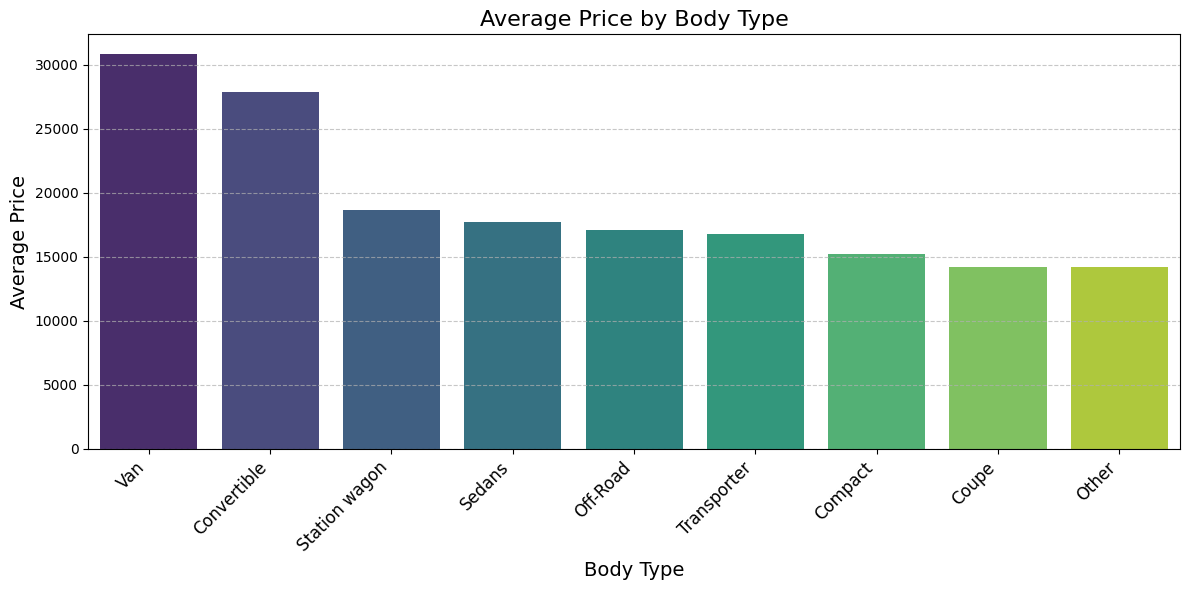

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Excel file
# Changed file path to the current directory
file_path = 'output.xlsx'  # If 'output.xlsx' is in the same directory as the script
# file_path = '/path/to/your/output.xlsx'  # Replace with the actual file path if different
data = pd.read_excel(file_path)

# Display the first few rows of the data
print("Original Data:")
print(data.head())

# Check if 'body_type' and 'price' columns exist
if 'body_type' in data.columns and 'price' in data.columns:
    # Calculate the average price by body_type
    avg_price_by_body_type = data.groupby('body_type')['price'].mean().sort_values(ascending=False)
    print("\nAverage price by body_type:")
    print(avg_price_by_body_type)

    # Plot the bar chart
    plt.figure(figsize=(12, 6))
    sns.barplot(x=avg_price_by_body_type.index, y=avg_price_by_body_type.values, palette="viridis")
    plt.title("Average Price by Body Type", fontsize=16)
    plt.xlabel("Body Type", fontsize=14)
    plt.ylabel("Average Price", fontsize=14)
    plt.xticks(rotation=45, ha='right', fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()
else:
    print("\nColumns 'body_type' and/or 'price' not found in the dataset.")

#python code for Display a pie chart for the proportion of different make_model.

Original Data:
                                                 url make_model  \
0  https://www.autoscout24.com//offers/audi-a1-sp...    Audi A1   
1  https://www.autoscout24.com//offers/audi-a1-1-...    Audi A1   
2  https://www.autoscout24.com//offers/audi-a1-sp...    Audi A1   
3  https://www.autoscout24.com//offers/audi-a1-1-...    Audi A1   
4  https://www.autoscout24.com//offers/audi-a1-sp...    Audi A1   

                                   short_description body_type  price  \
0        Sportback 1.4 TDI S-tronic Xenon Navi Klima    Sedans  15770   
1                                     1.8 TFSI sport    Sedans  14500   
2  Sportback 1.6 TDI S tronic Einparkhilfe plus+m...    Sedans  14640   
3                            1.4 TDi Design S tronic    Sedans  14500   
4  Sportback 1.4 TDI S-Tronic S-Line Ext. admired...    Sedans  16790   

                vat         km registration         prev_owner  kW  ...  \
0    VAT deductible  56,013 km      01/2016  2 previous owners NaN  

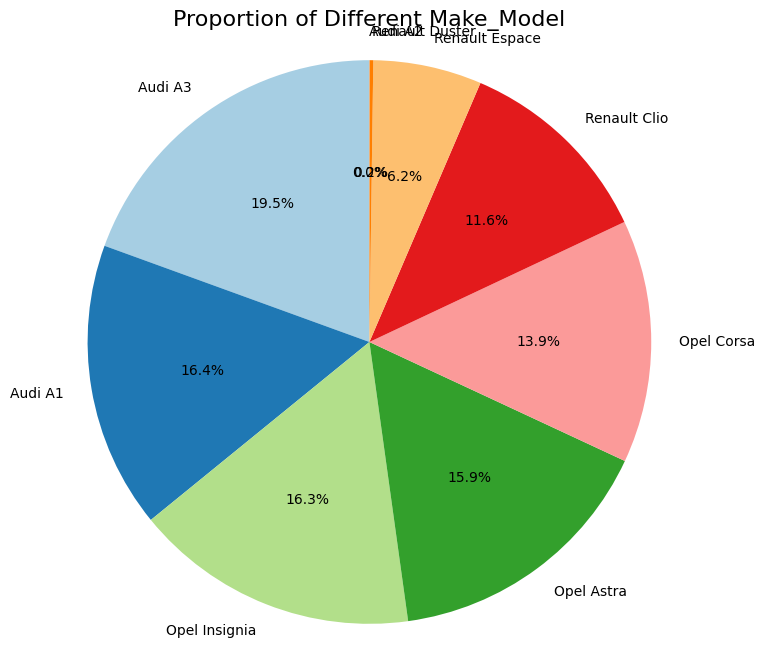

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the Excel file
file_path = 'output.xlsx'  # Adjust the file path as needed
data = pd.read_excel(file_path)

# Display the first few rows of the data
print("Original Data:")
print(data.head())

# Check if 'make_model' column exists
if 'make_model' in data.columns:
    # Count the frequency of each make_model
    make_model_counts = data['make_model'].value_counts()

    # Plot the pie chart
    plt.figure(figsize=(8, 8))
    plt.pie(make_model_counts, labels=make_model_counts.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
    plt.title("Proportion of Different Make_Model", fontsize=16)
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.show()
else:
    print("\nColumn 'make_model' not found in the dataset.")


#python code for Create a new column for the age of the car using the registration field.

In [23]:
import pandas as pd
from datetime import datetime

# Load the Excel file
file_path = 'output.xlsx'  # Adjust the file path as needed
data = pd.read_excel(file_path)

# Display the first few rows of the data
print("Original Data:")
print(data.head())

# Ensure 'registration' column is in datetime format
if 'registration' in data.columns:
    data['registration'] = pd.to_datetime(data['registration'], errors='coerce')

    # Calculate the car age based on the registration date
    current_year = datetime.now().year
    data['car_age'] = current_year - data['registration'].dt.year

    # Display the updated data with the new 'car_age' column
    print("\nUpdated Data with Car Age:")
    print(data[['registration', 'car_age']].head())

    # Save the updated data to a new Excel file
    updated_file_path = 'updated_with_car_age.xlsx'
    data.to_excel(updated_file_path, index=False)
    print(f"\nData with car age saved to {updated_file_path}")
else:
    print("\nColumn 'registration' not found in the dataset.")


Original Data:
                                                 url make_model  \
0  https://www.autoscout24.com//offers/audi-a1-sp...    Audi A1   
1  https://www.autoscout24.com//offers/audi-a1-1-...    Audi A1   
2  https://www.autoscout24.com//offers/audi-a1-sp...    Audi A1   
3  https://www.autoscout24.com//offers/audi-a1-1-...    Audi A1   
4  https://www.autoscout24.com//offers/audi-a1-sp...    Audi A1   

                                   short_description body_type  price  \
0        Sportback 1.4 TDI S-tronic Xenon Navi Klima    Sedans  15770   
1                                     1.8 TFSI sport    Sedans  14500   
2  Sportback 1.6 TDI S tronic Einparkhilfe plus+m...    Sedans  14640   
3                            1.4 TDi Design S tronic    Sedans  14500   
4  Sportback 1.4 TDI S-Tronic S-Line Ext. admired...    Sedans  16790   

                vat         km registration         prev_owner  kW  ...  \
0    VAT deductible  56,013 km      01/2016  2 previous owners NaN  

<ipython-input-23-548964a6ddbb>:14: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['registration'] = pd.to_datetime(data['registration'], errors='coerce')



Data with car age saved to updated_with_car_age.xlsx


#python code for Generate a price_per_km column to assess cost efficiency.

In [27]:
import pandas as pd

# Load the Excel file
file_path = 'output.xlsx'  # Adjust the file path as needed
data = pd.read_excel(file_path)

# Display the first few rows of the data
print("Original Data:")
print(data.head())

# Check if 'price' and 'km' columns exist
if 'price' in data.columns and 'km' in data.columns:
    # Convert 'km' column to numeric, handling errors
    data['km'] = pd.to_numeric(data['km'], errors='coerce')

    # Calculate the price_per_km column
    # Handle division by zero (if km is 0 or NaN)
    data['price_per_km'] = data['price'] / data['km'].replace(0, pd.NA)  # Replacing 0 km with NaN to avoid division by zero

    # Display the updated data with the new 'price_per_km' column
    print("\nUpdated Data with Price per KM:")
    print(data[['price', 'km', 'price_per_km']].head())

    # Save the updated data to a new Excel file
    updated_file_path = 'updated_with_price_per_km.xlsx'
    data.to_excel(updated_file_path, index=False)
    print(f"\nData with price_per_km saved to {updated_file_path}")
else:
    print("\nColumns 'price' and/or 'km' not found in the dataset.")

Original Data:
                                                 url make_model  \
0  https://www.autoscout24.com//offers/audi-a1-sp...    Audi A1   
1  https://www.autoscout24.com//offers/audi-a1-1-...    Audi A1   
2  https://www.autoscout24.com//offers/audi-a1-sp...    Audi A1   
3  https://www.autoscout24.com//offers/audi-a1-1-...    Audi A1   
4  https://www.autoscout24.com//offers/audi-a1-sp...    Audi A1   

                                   short_description body_type  price  \
0        Sportback 1.4 TDI S-tronic Xenon Navi Klima    Sedans  15770   
1                                     1.8 TFSI sport    Sedans  14500   
2  Sportback 1.6 TDI S tronic Einparkhilfe plus+m...    Sedans  14640   
3                            1.4 TDi Design S tronic    Sedans  14500   
4  Sportback 1.4 TDI S-Tronic S-Line Ext. admired...    Sedans  16790   

                vat         km registration         prev_owner  kW  ...  \
0    VAT deductible  56,013 km      01/2016  2 previous owners NaN  

#python code for Create categories for cars based on price (e.g., low, mid, high).

In [26]:
import pandas as pd

# Load the Excel file
file_path = 'output.xlsx'  # Adjust the file path as needed
data = pd.read_excel(file_path)

# Display the first few rows of the data
print("Original Data:")
print(data.head())

# Check if 'price' column exists
if 'price' in data.columns:
    # Define the price categories using pd.cut
    bins = [0, 10000, 30000, float('inf')]  # Adjust the ranges as needed (e.g., low: <=10k, mid: <=30k, high: >30k)
    labels = ['Low', 'Mid', 'High']

    data['price_category'] = pd.cut(data['price'], bins=bins, labels=labels, right=False)

    # Display the updated data with the new 'price_category' column
    print("\nUpdated Data with Price Category:")
    print(data[['price', 'price_category']].head())

    # Save the updated data to a new Excel file
    updated_file_path = 'updated_with_price_category.xlsx'
    data.to_excel(updated_file_path, index=False)
    print(f"\nData with price_category saved to {updated_file_path}")
else:
    print("\nColumn 'price' not found in the dataset.")


Original Data:
                                                 url make_model  \
0  https://www.autoscout24.com//offers/audi-a1-sp...    Audi A1   
1  https://www.autoscout24.com//offers/audi-a1-1-...    Audi A1   
2  https://www.autoscout24.com//offers/audi-a1-sp...    Audi A1   
3  https://www.autoscout24.com//offers/audi-a1-1-...    Audi A1   
4  https://www.autoscout24.com//offers/audi-a1-sp...    Audi A1   

                                   short_description body_type  price  \
0        Sportback 1.4 TDI S-tronic Xenon Navi Klima    Sedans  15770   
1                                     1.8 TFSI sport    Sedans  14500   
2  Sportback 1.6 TDI S tronic Einparkhilfe plus+m...    Sedans  14640   
3                            1.4 TDi Design S tronic    Sedans  14500   
4  Sportback 1.4 TDI S-Tronic S-Line Ext. admired...    Sedans  16790   

                vat         km registration         prev_owner  kW  ...  \
0    VAT deductible  56,013 km      01/2016  2 previous owners NaN  

#python code to Identify vehicles with specific features such as “VAT deductible”.

In [28]:
import pandas as pd

# Load the Excel file
file_path = 'output.xlsx'  # Adjust the file path as needed
data = pd.read_excel(file_path)

# Display the first few rows of the data
print("Original Data:")
print(data.head())

# Check if a column with features or descriptions exists
if 'features' in data.columns:  # Adjust the column name if needed (e.g., 'description', 'features', etc.)
    # Filter rows that contain 'VAT deductible' in the 'features' column
    vat_deductible_vehicles = data[data['features'].str.contains('VAT deductible', case=False, na=False)]

    # Display the filtered data
    print("\nVehicles with 'VAT deductible' feature:")
    print(vat_deductible_vehicles)

    # Save the filtered data to a new Excel file
    filtered_file_path = 'vat_deductible_vehicles.xlsx'
    vat_deductible_vehicles.to_excel(filtered_file_path, index=False)
    print(f"\nFiltered data saved to {filtered_file_path}")
else:
    print("\nColumn 'features' not found in the dataset.")


Original Data:
                                                 url make_model  \
0  https://www.autoscout24.com//offers/audi-a1-sp...    Audi A1   
1  https://www.autoscout24.com//offers/audi-a1-1-...    Audi A1   
2  https://www.autoscout24.com//offers/audi-a1-sp...    Audi A1   
3  https://www.autoscout24.com//offers/audi-a1-1-...    Audi A1   
4  https://www.autoscout24.com//offers/audi-a1-sp...    Audi A1   

                                   short_description body_type  price  \
0        Sportback 1.4 TDI S-tronic Xenon Navi Klima    Sedans  15770   
1                                     1.8 TFSI sport    Sedans  14500   
2  Sportback 1.6 TDI S tronic Einparkhilfe plus+m...    Sedans  14640   
3                            1.4 TDi Design S tronic    Sedans  14500   
4  Sportback 1.4 TDI S-Tronic S-Line Ext. admired...    Sedans  16790   

                vat         km registration         prev_owner  kW  ...  \
0    VAT deductible  56,013 km      01/2016  2 previous owners NaN  

#python code to Identify the most common car models in the dataset.

In [29]:
import pandas as pd

# Load the Excel file
file_path = 'output.xlsx'  # Adjust the file path as needed
data = pd.read_excel(file_path)

# Display the first few rows of the data
print("Original Data:")
print(data.head())

# Check if 'make_model' column exists
if 'make_model' in data.columns:
    # Count the frequency of each unique car model
    car_model_counts = data['make_model'].value_counts()

    # Display the most common car models
    print("\nMost Common Car Models:")
    print(car_model_counts.head())  # You can adjust the number here to show more models

    # Save the car model counts to a new Excel file
    car_model_counts_file = 'most_common_car_models.xlsx'
    car_model_counts.to_excel(car_model_counts_file, header=["Count"], index=True)
    print(f"\nMost common car models saved to {car_model_counts_file}")
else:
    print("\nColumn 'make_model' not found in the dataset.")


Original Data:
                                                 url make_model  \
0  https://www.autoscout24.com//offers/audi-a1-sp...    Audi A1   
1  https://www.autoscout24.com//offers/audi-a1-1-...    Audi A1   
2  https://www.autoscout24.com//offers/audi-a1-sp...    Audi A1   
3  https://www.autoscout24.com//offers/audi-a1-1-...    Audi A1   
4  https://www.autoscout24.com//offers/audi-a1-sp...    Audi A1   

                                   short_description body_type  price  \
0        Sportback 1.4 TDI S-tronic Xenon Navi Klima    Sedans  15770   
1                                     1.8 TFSI sport    Sedans  14500   
2  Sportback 1.6 TDI S tronic Einparkhilfe plus+m...    Sedans  14640   
3                            1.4 TDi Design S tronic    Sedans  14500   
4  Sportback 1.4 TDI S-Tronic S-Line Ext. admired...    Sedans  16790   

                vat         km registration         prev_owner  kW  ...  \
0    VAT deductible  56,013 km      01/2016  2 previous owners NaN  

#python code to Highlight the cars that provide the best value for money (low price_per_km).

In [30]:
import pandas as pd

# Load the Excel file
file_path = 'output.xlsx'  # Adjust the file path as needed
data = pd.read_excel(file_path)

# Display the first few rows of the data
print("Original Data:")
print(data.head())

# Check if 'price_per_km' column exists
if 'price_per_km' in data.columns:
    # Find the vehicles with the lowest 'price_per_km'
    # Set a threshold for low price_per_km (you can adjust this based on your data distribution)
    lowest_price_per_km = data['price_per_km'].min()

    # Filter cars with the lowest price_per_km
    best_value_vehicles = data[data['price_per_km'] == lowest_price_per_km]

    # Display the cars with the best value for money
    print("\nCars with the best value for money (lowest price_per_km):")
    print(best_value_vehicles)

    # Save the filtered data to a new Excel file
    best_value_vehicles_file = 'best_value_vehicles.xlsx'
    best_value_vehicles.to_excel(best_value_vehicles_file, index=False)
    print(f"\nBest value for money vehicles saved to {best_value_vehicles_file}")
else:
    print("\nColumn 'price_per_km' not found in the dataset.")


Original Data:
                                                 url make_model  \
0  https://www.autoscout24.com//offers/audi-a1-sp...    Audi A1   
1  https://www.autoscout24.com//offers/audi-a1-1-...    Audi A1   
2  https://www.autoscout24.com//offers/audi-a1-sp...    Audi A1   
3  https://www.autoscout24.com//offers/audi-a1-1-...    Audi A1   
4  https://www.autoscout24.com//offers/audi-a1-sp...    Audi A1   

                                   short_description body_type  price  \
0        Sportback 1.4 TDI S-tronic Xenon Navi Klima    Sedans  15770   
1                                     1.8 TFSI sport    Sedans  14500   
2  Sportback 1.6 TDI S tronic Einparkhilfe plus+m...    Sedans  14640   
3                            1.4 TDi Design S tronic    Sedans  14500   
4  Sportback 1.4 TDI S-Tronic S-Line Ext. admired...    Sedans  16790   

                vat         km registration         prev_owner  kW  ...  \
0    VAT deductible  56,013 km      01/2016  2 previous owners NaN  

#python code to Find the average price and mileage for VAT-deductible vehicles.

In [31]:
import pandas as pd

# Load the Excel file
file_path = 'output.xlsx'  # Adjust the file path as needed
data = pd.read_excel(file_path)

# Display the first few rows of the data
print("Original Data:")
print(data.head())

# Check if 'features' column exists
if 'features' in data.columns:
    # Filter rows that contain 'VAT deductible' in the 'features' column
    vat_deductible_vehicles = data[data['features'].str.contains('VAT deductible', case=False, na=False)]

    # Calculate the average price and mileage for VAT-deductible vehicles
    avg_price = vat_deductible_vehicles['price'].mean()
    avg_mileage = vat_deductible_vehicles['km'].mean()

    # Display the results
    print("\nAverage price and mileage for VAT-deductible vehicles:")
    print(f"Average Price: {avg_price:.2f}")
    print(f"Average Mileage: {avg_mileage:.2f}")

    # Save the results to a new Excel file
    results_file = 'vat_deductible_avg_price_mileage.xlsx'
    avg_data = pd.DataFrame({'Average Price': [avg_price], 'Average Mileage': [avg_mileage]})
    avg_data.to_excel(results_file, index=False)
    print(f"\nAverage price and mileage saved to {results_file}")
else:
    print("\nColumn 'features' not found in the dataset.")


Original Data:
                                                 url make_model  \
0  https://www.autoscout24.com//offers/audi-a1-sp...    Audi A1   
1  https://www.autoscout24.com//offers/audi-a1-1-...    Audi A1   
2  https://www.autoscout24.com//offers/audi-a1-sp...    Audi A1   
3  https://www.autoscout24.com//offers/audi-a1-1-...    Audi A1   
4  https://www.autoscout24.com//offers/audi-a1-sp...    Audi A1   

                                   short_description body_type  price  \
0        Sportback 1.4 TDI S-tronic Xenon Navi Klima    Sedans  15770   
1                                     1.8 TFSI sport    Sedans  14500   
2  Sportback 1.6 TDI S tronic Einparkhilfe plus+m...    Sedans  14640   
3                            1.4 TDi Design S tronic    Sedans  14500   
4  Sportback 1.4 TDI S-Tronic S-Line Ext. admired...    Sedans  16790   

                vat         km registration         prev_owner  kW  ...  \
0    VAT deductible  56,013 km      01/2016  2 previous owners NaN  

#python code for Group the vehicles based on attributes like price, km, and age.

In [32]:
import pandas as pd
from pandas.api.types import CategoricalDtype

# Load the Excel file
file_path = 'output.xlsx'  # Adjust the file path as needed
data = pd.read_excel(file_path)

# Display the first few rows of the data
print("Original Data:")
print(data.head())

# Check if the necessary columns exist
if 'price' in data.columns and 'km' in data.columns and 'car_age' in data.columns:
    # Group the vehicles based on price, km, and age using bins or categories

    # Price Range Categories (you can adjust these ranges)
    price_bins = [0, 10000, 30000, 50000, float('inf')]
    price_labels = ['Low', 'Mid', 'High', 'Luxury']
    data['price_category'] = pd.cut(data['price'], bins=price_bins, labels=price_labels, right=False)

    # Mileage Range Categories (adjust the ranges as needed)
    km_bins = [0, 50000, 100000, 150000, float('inf')]
    km_labels = ['Low Mileage', 'Medium Mileage', 'High Mileage', 'Very High Mileage']
    data['mileage_category'] = pd.cut(data['km'], bins=km_bins, labels=km_labels, right=False)

    # Age Categories (adjust the ranges as needed)
    age_bins = [0, 3, 6, 10, float('inf')]
    age_labels = ['New', 'Fairly New', 'Old', 'Very Old']
    data['age_category'] = pd.cut(data['car_age'], bins=age_bins, labels=age_labels, right=False)

    # Group by price category, mileage category, and age category, then calculate the mean price and mileage
    grouped = data.groupby(['price_category', 'mileage_category', 'age_category']).agg(
        avg_price=('price', 'mean'),
        avg_mileage=('km', 'mean'),
        count=('price', 'size')
    ).reset_index()

    # Display the grouped data
    print("\nGrouped Data (Price, Mileage, Age Categories):")
    print(grouped)

    # Save the grouped data to a new Excel file
    grouped_file_path = 'grouped_vehicles_by_price_km_age.xlsx'
    grouped.to_excel(grouped_file_path, index=False)
    print(f"\nGrouped data saved to {grouped_file_path}")
else:
    print("\nRequired columns 'price', 'km', or 'car_age' not found in the dataset.")


Original Data:
                                                 url make_model  \
0  https://www.autoscout24.com//offers/audi-a1-sp...    Audi A1   
1  https://www.autoscout24.com//offers/audi-a1-1-...    Audi A1   
2  https://www.autoscout24.com//offers/audi-a1-sp...    Audi A1   
3  https://www.autoscout24.com//offers/audi-a1-1-...    Audi A1   
4  https://www.autoscout24.com//offers/audi-a1-sp...    Audi A1   

                                   short_description body_type  price  \
0        Sportback 1.4 TDI S-tronic Xenon Navi Klima    Sedans  15770   
1                                     1.8 TFSI sport    Sedans  14500   
2  Sportback 1.6 TDI S tronic Einparkhilfe plus+m...    Sedans  14640   
3                            1.4 TDi Design S tronic    Sedans  14500   
4  Sportback 1.4 TDI S-Tronic S-Line Ext. admired...    Sedans  16790   

                vat         km registration         prev_owner  kW  ...  \
0    VAT deductible  56,013 km      01/2016  2 previous owners NaN  